<a href="https://colab.research.google.com/github/PMartey/DataJourney/blob/main/Stock_Index_and_RNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project involves accessing either yahoo.com or other stock index resources and pulling up and studying the stock index dataset available.  Then training your RNN model on this dataset and making a prediction about whether the stock will rise or fall over the next day or week.  You might also look at predicting a value.**

We will be using **Uber Technologies, Inc.** for this project

Data will range from: 05/10/2019 to 11/13/2023

Using Daily closing prices.

Link to data : "https://finance.yahoo.com/quote/UBER/history?p=UBER"

Import Libraries

In [ ]:
# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

#Load the Data set
We will be using the Close columns and since each obserrvation is seperated by the same interval of one day, you will not be interested in the date

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Stock market 11-23/UBER.csv', usecols= [4], encoding='ISO-8859-1')
dataset.head()

,Close
0,41.570000
1,37.099998
2,39.959999
3,41.290001
4,43.000000


# Plot the UBER time series data set


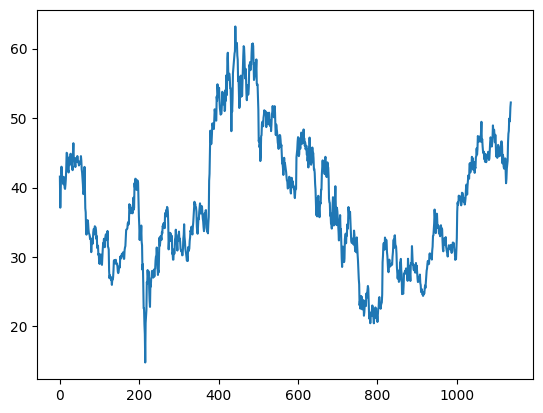

In [ ]:
plt.plot(dataset)
plt.show()

Import classes and functions


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Convert Pandas data frame to NumPy array

In [ ]:
dataset = dataset.values
dataset = dataset.astype('float32')

# Split into train and test sets

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

761 376


# Convert an array of values into a dataset matrix
Now you can define a function to create a new dataset where X= t and Y = t+1
Below is a function to prepare dataset for modeling

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# Reshape train and test datasets for modeling
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
#Seeing if it worked
pd.DataFrame(trainX).head(), pd.DataFrame(trainY).head()

# Create and Fit Multilayer Perceptron model

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
#Compile
model.compile(loss='mean_squared_error', optimizer='adam')
#Fit model using mean squared error
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

# Estimate Model Performance (Evaluate the fit model)


In [ ]:

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

Train Score: 1.98 MSE (1.41 RMSE)
Test Score: 1.19 MSE (1.09 RMSE)


Train Score: 1.98 MSE (1.41 RMSE) ***So the model has an average error of 1.41 dollars on the training data set ***
Test Score: 1.19 MSE (1.09 RMSE) ***similarly the model has an average error of 1.09 dollars on the test dataset***

# Generate Predictions for training and test dataset

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

12/12 [==============================] - 0s 3ms/step


# Shift Train predictions for plotting

> Indented block



In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift Test predictions for plotting


In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline (blue) and predictions(train is green and test is red)

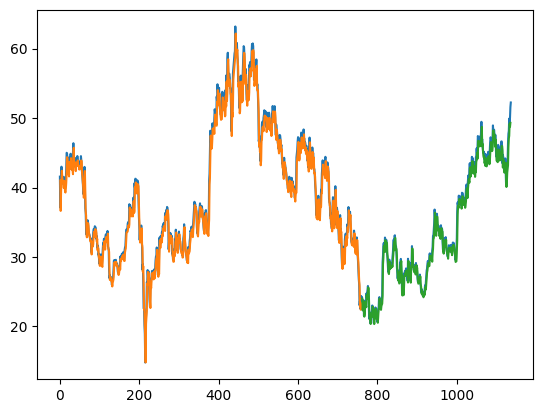

In [ ]:
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()